In [8]:
import tabulate

params_dict = {
    "Name": ["John", "Alice"],
    "Age": [25, 30]
}

params_header = ['Name', 'Age']

print(tabulate.tabulate(params_dict, headers=params_header, tablefmt="plain"))
# 等等，使用其它格式

print('\nsimple:\n',tabulate.tabulate(params_dict, headers=params_header, tablefmt="simple")) 
print('\ngithub\n', tabulate.tabulate(params_dict, headers=params_header, tablefmt="github"))
print("\ngrid\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="grid"))
print("\nfancy_grid\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="fancy_grid"))
print("\npipe\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="pipe"))
print("\njira\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="jira"))
print("\npsql\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="psql"))
print("\nrst\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="rst"))
print("\nmediawiki\n",tabulate.tabulate(params_dict, headers=params_header, tablefmt="mediawiki"))

Name      Age
John       25
Alice      30

simple:
 Name      Age
------  -----
John       25
Alice      30

github
 | Name   |   Age |
|--------|-------|
| John   |    25 |
| Alice  |    30 |

grid
 +--------+-------+
| Name   |   Age |
+========+=======+
| John   |    25 |
+--------+-------+
| Alice  |    30 |
+--------+-------+

fancy_grid
 ╒════════╤═══════╕
│ Name   │   Age │
╞════════╪═══════╡
│ John   │    25 │
├────────┼───────┤
│ Alice  │    30 │
╘════════╧═══════╛

pipe
 | Name   |   Age |
|:-------|------:|
| John   |    25 |
| Alice  |    30 |

jira
 || Name   ||   Age ||
| John   |    25 |
| Alice  |    30 |

psql
 +--------+-------+
| Name   |   Age |
|--------+-------|
| John   |    25 |
| Alice  |    30 |
+--------+-------+

rst
 ======  =====
Name      Age
======  =====
John       25
Alice      30
======  =====

mediawiki
 {| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! Name   !! align="right"|   Age
|-
| John   || align="right"|    25
|-
| Alic

In [33]:
import cv2
import torch
from PIL import Image
import torchvision.transforms as transforms
path = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/masks/Image1-001_0_0_3.png"

img = Image.open(path)
tensor = transforms.ToTensor()
img_tensor = tensor(img)
print(img_tensor.to(torch.int8))

img_tensor.to(torch.int8).unique().item()

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.int8)


0

tensor([0., 1., 2.])


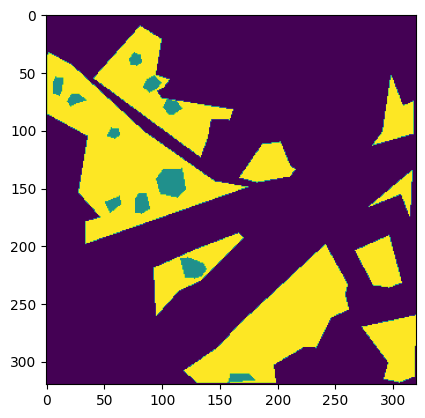

In [26]:
from matplotlib import pyplot as plt

for i, item in enumerate(img_tensor.unique()):
    # print(i, item.item())
    mask = [img_tensor == item.item()]
    img_tensor[mask] = i
    # print(mask)
print(img_tensor.unique())

img_numpy = img_tensor.numpy()
plt.imshow(img_numpy[0,...])

In [12]:
import torchvision.transforms as transforms
from PIL import Image
img_path = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/images/Image1-001_0_0_1.jpg'
mask_path = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/mask_int/Image1-001_0_0_1.png'
img = Image.open(img_path).convert('L')
mask = Image.open(mask_path).convert('L')
print(img.size, mask.size)
img_tensor = transforms.ToTensor()(img)
mask_tensor = transforms.ToTensor()(mask)
print(img_tensor.shape, mask_tensor.shape)

(320, 320) (320, 320)
torch.Size([1, 320, 320]) torch.Size([1, 320, 320])


In [7]:
import numpy as np 
import cv2
from PIL import Image
test1 = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/jupyter/Image1 - 001-segmentation.png"

img_1 = Image.open(test1)
img_1 = np.array(img_1)

img = cv2.imread(test1)
print("PIL:", np.unique(img_1))
print("cv2:", np.unique(img))


PIL: [  0  95 128 135 175 215 255]
cv2: [  0  95 128 135 175 215 255]


In [3]:
import os
import numpy as np
from PIL import Image

path_1 = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/masks'
path_list = os.listdir(path_1)
over_mask = {}
for item in path_list:
    img_1 = Image.open(os.path.join(path_1, item))
    img1_array = np.array(img_1)
    print(np.unique(img1_array))
    # if len(np.unique(img1_array)) > 4:
    #     unique_mask = np.unique(img1_array)
    #     over_mask[item] = unique_mask
# print("不符合的mask数量:", len(over_mask))

# 记录over_mask图片
# over_mask_path = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/over_mask'
# if not os.path.exists(over_mask_path):
#     os.mkdir(over_mask_path)
# for img_name, _ in over_mask.items():
#     img_path = os.path.join(path_1, img_name)
#     img = Image.open(img_path)
#     save_path = os.path.join(over_mask_path, img_name)  # 指定保存路径和文件名
#     img.save(save_path)


[0 1 2]
[0 1]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2

In [1]:
import os
import numpy as np
from PIL import Image

over_mask_path = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/over_mask'
path_list = os.listdir(over_mask_path)

for item in path_list:
    img_path = os.path.join(over_mask_path, item)
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/over_mask'

In [3]:
import pandas as pd
import os
csv = "/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/CSV/SEM_int_path.csv"
over_mask_path = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/over_mask'
mask = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/mask_int'
img = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/images'
# 读取CSV文件
df = pd.read_csv(csv)

# 获取目录下的所有文件名
path_list = os.listdir(over_mask_path)

# 构建完整的文件路径列表
full_img_paths = [os.path.join(img, f) for f in path_list]
full_mask_paths = [os.path.join(mask, f) for f in path_list]

# 删除CSV中'mask'和'img'列包含在full_paths中的行
df = df[~df['mask'].isin(full_mask_paths) & ~df['img'].isin(full_img_paths)]

# 将更新后的DataFrame重新写入CSV文件
df.to_csv(csv, index=False)

print("CSV文件已更新。")

CSV文件已更新。


[0]


IndexError: index 1 is out of bounds for dimension 0 with size 1

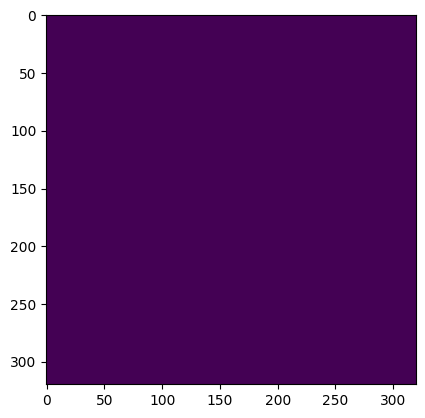

In [2]:
import cv2
import torch
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

i_path = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/SEM_DATA/masks/Image1 - 001_320_320.png'
i_img = cv2.imread(i_path, cv2.IMREAD_GRAYSCALE)
print(np.unique(i_img))  # 打印图像中的唯一值

# 确保 i_img 是正确的数据类型
i_img = np.array(i_img, dtype=np.uint8)  # 可能需要根据实际情况调整数据类型

mask_array_copy = np.digitize(i_img, bins=np.unique(i_img), right=True)

i_tensor = torch.tensor(mask_array_copy).long()
plt.imshow(mask_array_copy)
_one_hot = F.one_hot(i_tensor, num_classes=len(np.unique(i_img)))

# 确保 one_hot 编码的形状是正确的
_one_hot = _one_hot.permute(2 , 0, 1)  # 调整维度顺序，如果有需要

# 分离各个通道 
c1 = _one_hot[0, ...]
c2 = _one_hot[1, ...]
c3 = _one_hot[2, ...]
c4 = _one_hot[3, ...]

# 转换为 numpy 数组并可视化
c1_array = c1.numpy()
c2_array = c2.numpy()
c3_array = c3.numpy()
c4_array = c4.numpy()


plt.figure(figsize=(12, 8))
plt.subplot(1, 6, 1)
plt.imshow(i_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 6, 2)
plt.imshow(c1_array, cmap='gray')
plt.title('Class 1')

plt.subplot(1, 6, 3)
plt.imshow(c2_array, cmap='gray')
plt.title('Class 2')

plt.subplot(1, 6, 4)
plt.imshow(c3_array, cmap='gray')
plt.title('Class 3')

plt.subplot(1, 6, 5)
plt.imshow(c4_array, cmap='gray')
plt.title('Class 4')

plt.subplot(1, 6, 6)
plt.imshow(c4_array, cmap='gray')
plt.title('Class 5')

plt.show()

所有 JSON 文件中的 imagePath 已更新完成。


In [8]:
import os
import json

# 定义输入目录
input_dir = '/mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320'

# 遍历目录中的所有 JSON 文件
for filename in os.listdir(input_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(input_dir, filename)

        # 读取 JSON 文件
        try:
            with open(file_path, 'r') as f:
                data = json.load(f)
        except FileNotFoundError:
            print(f"文件未找到: {file_path}")
            continue
        except json.JSONDecodeError:
            print(f"JSON 解析错误: {file_path}")
            continue

        # 更新 imagePath 字段
        try:
            # 获取当前 JSON 文件的目录
            current_dir = os.path.dirname(file_path)
            
            # 获取 imagePath 中的文件名
            image_filename = os.path.basename(data['imagePath'])
            image_filename = image_filename.split('\\')[2] 
            
            # 构建新的 imagePath
            new_image_path = os.path.join(current_dir, image_filename)
            
            # 更新 imagePath 字段
            data['imagePath'] = new_image_path
        except KeyError:
            print(f"缺少 imagePath 字段: {file_path}")
            continue

        # 写回 JSON 文件
        try:
            with open(file_path, 'w') as f:
                json.dump(data, f, indent=4)
        except IOError:
            print(f"写入文件错误: {file_path}")
            continue

        print(f"已更新文件: {file_path}")

print("所有 JSON 文件中的 imagePath 已更新完成。")

已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_0_0.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_0_1280.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_0_1600.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_0_320.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_0_640.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_0_960.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_1280_0.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_1280_1280.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_1280_1600.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_1280_320.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_1280_640.json
已更新文件: /mnt/c/VScode/WS-Hub/WS-U2net/U-2-Net/utils/js_320/Image1 - 001_1280_960.jso